In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import loadmat

In [2]:
def cost_func(theta, X, y, lambda_):
    m = X.shape[0]
    h = X @ theta
    J = (1 / (2*m)) * np.sum((h - y) ** 2)
    reg = (lambda_ / (2*m)) * np.sum(theta[1:] ** 2)
    J = J + reg
    
    delta = (1/m) * (X.T @ (h - y))
    grad = np.zeros((theta.shape))
    grad[0] = delta[0]
    grad[1:] = delta[1:] + (lambda_ / m) * theta[1:]
    return J, grad

### Gradient Descent

In [81]:
class GradientDescent:
    def __init__(self, X, y):
        self.X = X.astype(float)
        self.y = y.astype(float)
        self.m = X.shape[0]            # no. of data
        self.n = X.shape[1]            # no. of features
        self.theta = np.zeros((self.n, 1))
    
    def fit(self, alpha, no_iter, lambda_=0, plot_J=True):
        J = []
        for _ in range(no_iter):
            cost, grad = cost_func(self.theta, self.X, self.y, lambda_)
            self.theta = self.theta - (alpha * grad)
            J.append(cost)
        
        if plot_J:
            plt.plot(np.arange(no_iter), J)
            plt.xlabel('No. of iterations')
            plt.ylabel('J(thetas)')
            plt.show()
        
    def predict(self, X_test):
        return X_test @ self.theta
    
    def get_cost(self, X, y):
        m = X.shape[0]
        h = X @ self.theta
        J = (1 / (2*m)) * np.sum((h - y) ** 2)
        return J

### Examples

In [4]:
def mean_normalization(x):
    s = np.max(x) - np.min(x)
    return (x - np.average(x)) / s

In [5]:
def add_ones(X):
    return np.insert(X, 0, np.ones((1, X.shape[0])), axis=1).astype(float)

#### n = 1 feature

In [6]:
df1 = pd.read_csv('../datasets/Salary_Data.csv')
df1.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


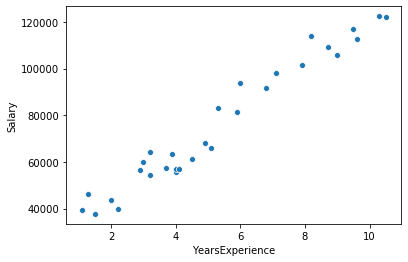

In [7]:
sns.scatterplot(x='YearsExperience', y='Salary', data=df1)

In [8]:
X = df1.iloc[:, 0].values.reshape(-1, 1)
y = df1.iloc[:, 1].values.reshape(-1, 1)

In [9]:
X_train = add_ones(X)
y_train = y

In [10]:
gd1 = GradientDescent(X_train, y_train)

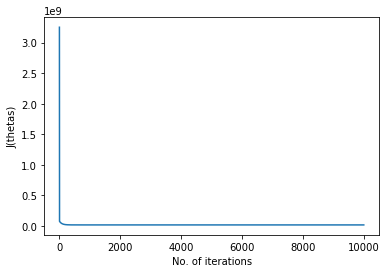

array([[25792.20019867],
       [ 9449.96232146]])

In [11]:
gd1.fit(alpha=0.03, no_iter=10000)
gd1.theta

In [12]:
y_pred = gd1.predict(X_train)

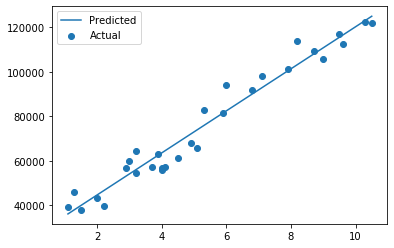

In [13]:
plt.scatter(X, y, label='Actual')
plt.plot(X, y_pred, label='Predicted')
plt.legend()
plt.show()

#### n > 1 features

In [14]:
df2 = pd.read_csv('../datasets/50_startups.csv')
print(df2.describe())
df2.head()

           R&D Spend  Administration  Marketing Spend         Profit
count      50.000000       50.000000        50.000000      50.000000
mean    73721.615600   121344.639600    211025.097800  112012.639200
std     45902.256482    28017.802755    122290.310726   40306.180338
min         0.000000    51283.140000         0.000000   14681.400000
25%     39936.370000   103730.875000    129300.132500   90138.902500
50%     73051.080000   122699.795000    212716.240000  107978.190000
75%    101602.800000   144842.180000    299469.085000  139765.977500
max    165349.200000   182645.560000    471784.100000  192261.830000


,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [15]:
df2['State'] = pd.factorize(df2['State'])[0]
df2.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,0,192261.83
1,162597.70,151377.59,443898.53,1,191792.06
2,153441.51,101145.55,407934.54,2,191050.39
3,144372.41,118671.85,383199.62,0,182901.99
4,142107.34,91391.77,366168.42,2,166187.94


In [16]:
df2['R&D Spend'] = mean_normalization(df2['R&D Spend'].values)
df2['Administration'] = mean_normalization(df2['Administration'].values)
df2['Marketing Spend'] = mean_normalization(df2['Marketing Spend'].values)
df2['State'] = mean_normalization(df2['State'].values)
df2.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,0.554146,0.118399,0.552708,-0.49,192261.83
1,0.537505,0.228627,0.493602,0.01,191792.06
2,0.482131,-0.153766,0.417372,0.51,191050.39
3,0.427282,-0.020347,0.364943,-0.49,182901.99
4,0.413584,-0.228017,0.328844,0.51,166187.94


In [17]:
X = df2.iloc[:, :4].values
y = df2.iloc[:, 4].values

In [18]:
X_train = add_ones(X)
y_train = y.reshape(-1, 1)

In [19]:
gd2 = GradientDescent(X_train, y_train)

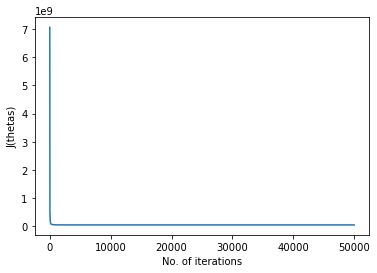

array([[112012.6392    ],
       [133279.53801302],
       [ -3545.08917071],
       [ 12750.67692487],
       [   237.02931182]])

In [20]:
gd2.fit(alpha=0.1, no_iter=50000)
gd2.theta

In [21]:
y_pred = gd2.predict(X_train)

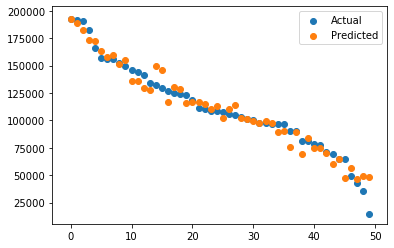

In [22]:
plt.scatter(np.arange(y_train.shape[0]), y, label='Actual')
plt.scatter(np.arange(y_pred.shape[0]), y_pred, label='Predicted')
plt.legend()
plt.show()

#### Polynomial Regression

In [23]:
df3 = pd.read_csv('../datasets/Position_Salaries.csv')
df3.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [24]:
X = df3.iloc[:, 1].values.reshape(-1, 1)
y = df3.iloc[:, 2].values.reshape(-1, 1)

In [25]:
X_train, y_train = X.astype(float), y.astype(float)
X_train = np.append(X_train, np.power(X, 2), axis=1)
X_train = np.append(X_train, np.power(X, 3), axis=1)
X_train

array([[   1.,    1.,    1.],
       [   2.,    4.,    8.],
       [   3.,    9.,   27.],
       [   4.,   16.,   64.],
       [   5.,   25.,  125.],
       [   6.,   36.,  216.],
       [   7.,   49.,  343.],
       [   8.,   64.,  512.],
       [   9.,   81.,  729.],
       [  10.,  100., 1000.]])

In [26]:
X_train[:, 0] = mean_normalization(X_train[:, 0])
X_train[:, 1] = mean_normalization(X_train[:, 1])
X_train[:, 2] = mean_normalization(X_train[:, 2])
X_train

array([[-0.5       , -0.37878788, -0.3018018 ],
       [-0.38888889, -0.34848485, -0.29479479],
       [-0.27777778, -0.2979798 , -0.27577578],
       [-0.16666667, -0.22727273, -0.23873874],
       [-0.05555556, -0.13636364, -0.17767768],
       [ 0.05555556, -0.02525253, -0.08658659],
       [ 0.16666667,  0.10606061,  0.04054054],
       [ 0.27777778,  0.25757576,  0.20970971],
       [ 0.38888889,  0.42929293,  0.42692693],
       [ 0.5       ,  0.62121212,  0.6981982 ]])

In [27]:
X_train = add_ones(X_train)

In [28]:
gd3 = GradientDescent(X_train, y_train)

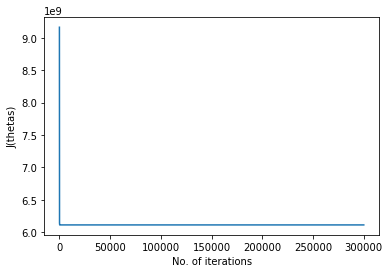

array([[249500.        ],
       [-99513.50226324],
       [262177.7844015 ],
       [605566.31892401]])

In [38]:
gd3.fit(alpha=1, no_iter=300000, lambda_=0.1)
gd3.theta

In [39]:
y_pred = gd3.predict(X_train)

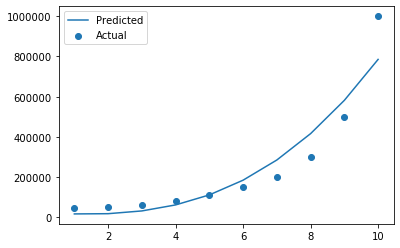

In [40]:
plt.scatter(X, y, label='Actual')
plt.plot(X, y_pred, label='Predicted')
plt.legend()
plt.show()